# Plant Recommender Project

## Data Loading and Cleaning

For this prject, I will be interfacing with a `SQLite` database pulled from the [USDA PLANTS Database](https://plants.sc.egov.usda.gov/home). This data was collected via the use of an API that the USDA provides for all of their databases. To read in the SQL data correctly:

In [1]:
# Imports
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

I used [this](https://datacarpentry.org/python-ecology-lesson/09-working-with-sql/index.html) site to help me import data.

In [2]:
# Read in the data into a dataframe
con = sqlite3.connect('../datasets/usdadb_new.sqlite3')
df = pd.read_sql_query('''
                       SELECT * 
                       FROM usda
                       WHERE Temperature_Minimum_F IS NOT ''
                       ''', con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

# Close the connection
con.close()

   id Symbol Accepted_Symbol_x Synonym_Symbol_x  \
0  21   ABBA              ABBA                    
1  40   ABCO              ABCO                    
2  55   ABFR              ABFR                    
3  62   ABGR              ABGR                    
4  65  ABGR4             ABGR4                    

                                   Scientific_Name_x Hybrid_Genus_Indicator  \
0                          Abies balsamea (L.) Mill.                          
1  Abies concolor (Gord. & Glend.) Lindl. ex Hild...                          
2                        Abies fraseri (Pursh) Poir.                          
3           Abies grandis (Douglas ex D. Don) Lindl.                          
4      Abelia ×grandiflora (Rovelli ex André) Rehder                          

  Hybrid_Species_Indicator      Species Subspecies_Prefix  \
0                              balsamea                     
1                              concolor                     
2                               fra

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Columns: 134 entries, id to Genus
dtypes: int64(1), object(133)
memory usage: 1.1+ MB


In [4]:
df.columns

Index(['id', 'Symbol', 'Accepted_Symbol_x', 'Synonym_Symbol_x',
       'Scientific_Name_x', 'Hybrid_Genus_Indicator',
       'Hybrid_Species_Indicator', 'Species', 'Subspecies_Prefix',
       'Hybrid_Subspecies_Indicator',
       ...
       'Naval_Store_Product', 'Nursery_Stock_Product',
       'Palatable_Browse_Animal', 'Palatable_Graze_Animal', 'Palatable_Human',
       'Post_Product', 'Protein_Potential', 'Pulpwood_Product',
       'Veneer_Product', 'Genus'],
      dtype='object', length=134)

In [5]:
df.isnull().sum().any()

False

There do not seem to be any nulls in the dataset. The main challenge here will be converting the columns to useable data for clustering. The first step here will be to cut down the number of features to only include features relevant to growing conditions:

In [5]:
df.head()

,id,Symbol,Accepted_Symbol_x,Synonym_Symbol_x,Scientific_Name_x,Hybrid_Genus_Indicator,Hybrid_Species_Indicator,Species,Subspecies_Prefix,Hybrid_Subspecies_Indicator,...,Naval_Store_Product,Nursery_Stock_Product,Palatable_Browse_Animal,Palatable_Graze_Animal,Palatable_Human,Post_Product,Protein_Potential,Pulpwood_Product,Veneer_Product,Genus
0,21,ABBA,ABBA,,Abies balsamea (L.) Mill.,,,balsamea,,,...,Yes,Yes,Medium,,No,No,Low,Yes,Yes,Abies
1,40,ABCO,ABCO,,Abies concolor (Gord. & Glend.) Lindl. ex Hild...,,,concolor,,,...,No,Yes,Low,,No,No,Low,Yes,Yes,Abies
2,55,ABFR,ABFR,,Abies fraseri (Pursh) Poir.,,,fraseri,,,...,No,Yes,Low,,No,No,Low,Yes,Yes,Abies
3,62,ABGR,ABGR,,Abies grandis (Douglas ex D. Don) Lindl.,,,grandis,,,...,No,Yes,Low,,No,No,Low,Yes,Yes,Abies
4,65,ABGR4,ABGR4,,Abelia ×grandiflora (Rovelli ex André) Rehder,,×,grandiflora,,,...,No,Yes,Low,,No,No,Low,No,No,Abelia


In [6]:
df.tail()

,id,Symbol,Accepted_Symbol_x,Synonym_Symbol_x,Scientific_Name_x,Hybrid_Genus_Indicator,Hybrid_Species_Indicator,Species,Subspecies_Prefix,Hybrid_Subspecies_Indicator,...,Naval_Store_Product,Nursery_Stock_Product,Palatable_Browse_Animal,Palatable_Graze_Animal,Palatable_Human,Post_Product,Protein_Potential,Pulpwood_Product,Veneer_Product,Genus
1074,91741,YUBA,YUBA,,Yucca baccata Torr.,,,baccata,,,...,No,Yes,Low,Low,No,No,Low,No,No,Yucca
1075,91752,YUBRB,YUBRB,,Yucca brevifolia Engelm. var. brevifolia,,,brevifolia,,,...,No,Yes,Low,Low,No,No,Low,No,No,Yucca
1076,91764,YUEL,YUEL,,Yucca elata (Engelm.) Engelm.,,,elata,,,...,No,Yes,Low,Low,No,No,Low,No,No,Yucca
1077,91776,YUGL,YUGL,,Yucca glauca Nutt.,,,glauca,,,...,No,Yes,Low,Low,No,No,Low,No,No,Yucca
1078,92008,ZIAQ,ZIAQ,,Zizania aquatica L.,,,aquatica,,,...,No,No,High,Medium,Yes,No,Medium,No,No,Zizania


### EDA

Before I continue with the data cleaning process, I will make a few charts detailing the makeup of this dataset:

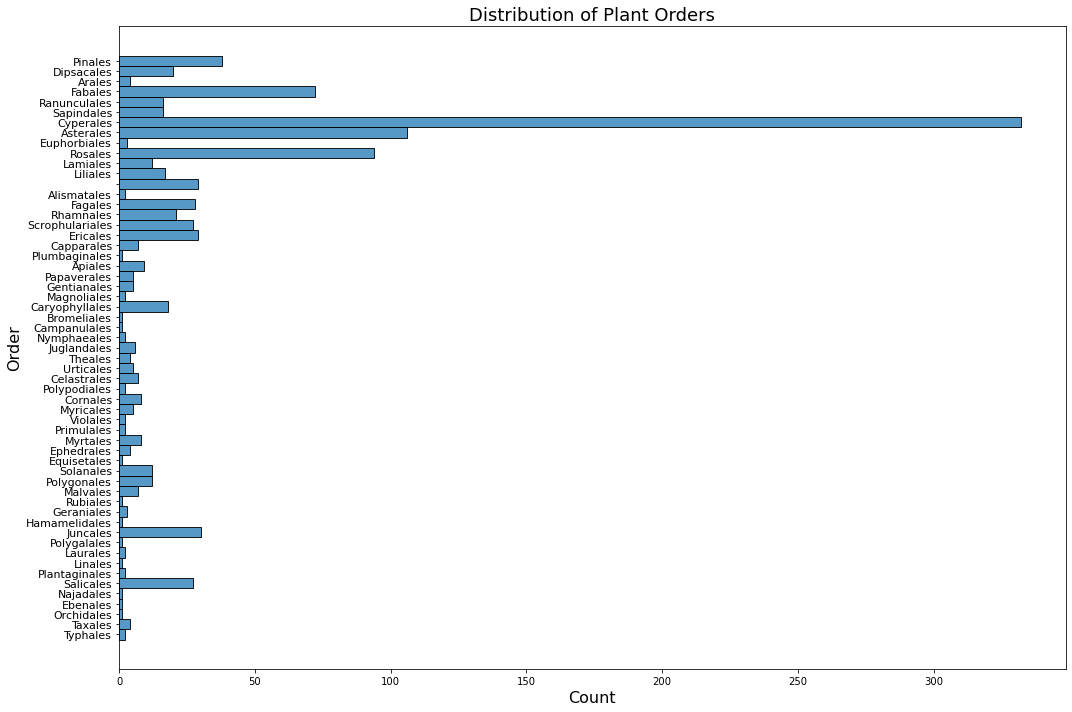

In [32]:
# Bar plot for the plant families represented
plt.figure(figsize=(15, 10))
sns.histplot(data=df, y='xOrder', binwidth=50)
plt.title('Distribution of Plant Orders', fontsize=18)
plt.yticks(fontsize=11)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Order', fontsize=16)
plt.tight_layout()
plt.savefig('../assets/plant-orders.jpeg')
plt.show()

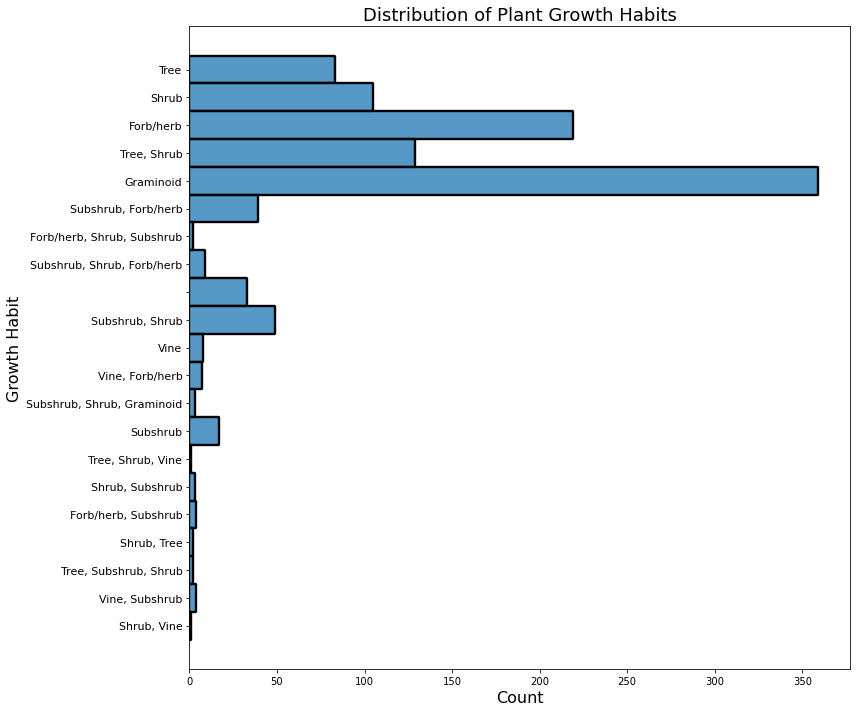

In [31]:
# Now for growth habit
plt.figure(figsize=(12, 10))
sns.histplot(data=df, y='Growth_Habit')
plt.title('Distribution of Plant Growth Habits', fontsize=18)
plt.yticks(fontsize=11)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Growth Habit', fontsize=16)
plt.tight_layout()
plt.savefig('../assets/plant-growth-habits.jpeg')
plt.show()

In [8]:
# Save what has been filtered down so far
df.to_csv('../datasets/raw-filtered-data.csv', index=False)

The only way I know how to filter this data down in terms of features available is to create a list of features to keep. Here is the list of features I will keep in this dataset for later use - note that I will be keeping `id` just so I can cross-reference it with the initial dataset and `SQLite` database:

In [9]:
features = ['id', 'Scientific_Name_x', 'Category', 'Family', 'Growth_Habit', 'Native_Status',
           'Active_Growth_Period', 'Fall_Conspicuous', 'Fire_Resistance', 'Flower_Color',
           'Flower_Conspicuous', 'Fruit_Conspicuous', 'Growth_Rate', 'Lifespan', 'Toxicity',
           'Drought_Tolerance', 'Hedge_Tolerance', 'Moisture_Use', 'pH_Minimum', 'pH_Maximum',
           'Salinity_Tolerance', 'Shade_Tolerance', 'Temperature_Minimum_F', 'Bloom_Period']

In [10]:
df = df[features]

Now let's begin the process of one-hot encoding all of the categorical features and scaling all of the ordinal features. Most of the features listed above fall into either one of these categories. I will first separate these features by categorical, ordinal, or nominal:

In [11]:
categorical_features = ['Category', 'Family', 'Growth_Habit', 'Native_Status',
           'Active_Growth_Period', 'Fall_Conspicuous', 'Flower_Color',
           'Flower_Conspicuous', 'Fruit_Conspicuous', 'Bloom_Period', 'Fire_Resistance']

ordinal_features = ['Toxicity', 'Drought_Tolerance', 'Hedge_Tolerance',
                   'Moisture_Use', 'Salinity_Tolerance', 'Shade_Tolerance', 'Growth_Rate', 'Lifespan']

other_features = ['id', 'Scientific_Name_x', 'pH_Minimum', 'pH_Maximum',
                      'Temperature_Minimum_F']

I pulled the following function from [this Kaggle submission.](https://www.kaggle.com/taolearnstolearn/a-single-pipeline-with-lasso-regression) This will allow me to create a dictionary of numeric values to map to the unique strings contained in each feature.

In [12]:
# Print out unique keys for each categorical feature
for feature in categorical_features:
    print(feature, df[feature].unique())

Category ['Gymnosperm' 'Dicot' 'Monocot' '' 'Fern' 'Horsetail']
Family ['Pinaceae' 'Caprifoliaceae' 'Acoraceae' 'Fabaceae' 'Ranunculaceae'
 'Aceraceae' 'Poaceae' 'Asteraceae' 'Euphorbiaceae' 'Rosaceae'
 'Hippocastanaceae' 'Lamiaceae' 'Agavaceae' 'Simaroubaceae' 'Liliaceae' ''
 'Alismataceae' 'Betulaceae' 'Vitaceae' 'Boraginaceae' 'Acanthaceae'
 'Ericaceae' 'Brassicaceae' 'Plumbaginaceae' 'Araliaceae' 'Papaveraceae'
 'Araceae' 'Asclepiadaceae' 'Annonaceae' 'Chenopodiaceae' 'Verbenaceae'
 'Bromeliaceae' 'Cyperaceae' 'Campanulaceae' 'Cabombaceae' 'Juglandaceae'
 'Fagaceae' 'Scrophulariaceae' 'Clusiaceae' 'Bignoniaceae' 'Berberidaceae'
 'Rhamnaceae' 'Ulmaceae' 'Celastraceae' 'Dicksoniaceae' 'Clethraceae'
 'Portulacaceae' 'Cornaceae' 'Fumariaceae' 'Myricaceae' 'Cucurbitaceae'
 'Primulaceae' 'Elaeagnaceae' 'Onagraceae' 'Ephedraceae' 'Equisetaceae'
 'Hydrophyllaceae' 'Polygonaceae' 'Hydrangeaceae' 'Cactaceae'
 'Fouquieriaceae' 'Oleaceae' 'Sterculiaceae' 'Rubiaceae' 'Garryaceae'
 'Gentianaceae

In [13]:
# Print out unique keys for each ordinal feature
for feature in ordinal_features:
    print(feature, df[feature].unique())

Toxicity ['None' 'Slight' 'Moderate' 'Severe' '']
Drought_Tolerance ['Low' 'Medium' 'None' 'High']
Hedge_Tolerance ['Low' 'High' 'None' 'Medium' '']
Moisture_Use ['Medium' 'Low' 'High']
Salinity_Tolerance ['None' 'Low' 'Medium' 'High']
Shade_Tolerance ['Tolerant' 'Intermediate' 'Intolerant']
Growth_Rate ['Slow' 'Moderate' 'Rapid' '']
Lifespan ['Short' 'Long' 'Moderate' '']


In [14]:
# Dictionary to map the ordinal features
ord_dict = {
   # Toxicity
   'None':0, 'Slight':1, 'Moderate':2, 'Severe':3,
    
   # Tolerances other than shade tolerance
   'None':0, 'Low':1, 'Medium':2, 'High':3,

   # Shade Tolerance
   'Intolerant':0, 'Intermediate':1, 'Tolerant':2,
    
   # Unique keys for Growth Rate and Lifespan
   'Slow':1, 'Short':1, 'Long':3, 'Rapid':3
}

In [15]:
# Map the ordinal features to numeric values to retain their ordinality
def ordinal_mapper(df, ord_features):
    # Fill empty strings with 0
    df[ord_features] = df[ord_features].replace('', -1)
    
    # Get values from the dictionary using the get method
    df = df.applymap(lambda x: ord_dict.get(x,x))
    return df

In [16]:
df = ordinal_mapper(df, ordinal_features)

In [17]:
# Now dummify the nominal columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True, dummy_na=True)

In [18]:
# Save this version of the data as well
df.to_csv('../datasets/cleaned-data.csv',index=False)

With the data cleaned and saved, we can move onto the modeling portion, which can be found in [this notebook](02-modeling.ipynb). Also, if you would like to get a more condensed version of this cleaning code, you can find it [here.](cleaner.py)